This notebook is intended to test the mavenn functionality which enables the computation of parameter uncertainties via inference on simulated data

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import time
import tensorflow as tf
%matplotlib notebook

#Load mavenn and check path
import mavenn

In [2]:
style_file_name = 'fig_S2.style'
s = """
axes.linewidth:     0.5     # edge linewidth
font.size:          8.0
axes.labelsize:     8.0  # fontsize of the x any y labels
axes.titlesize:     8.0
xtick.labelsize:    8.0  # fontsize of the tick labels
ytick.labelsize:    8.0  # fontsize of the tick labels
legend.fontsize:      8.0
legend.borderpad:     0.2  # border whitespace
legend.labelspacing:  0.2  # the vertical space between the legend entries
legend.borderaxespad: 0.2  # the border between the axes and legend edge
legend.framealpha:    1.0 
lines.dash_capstyle:   round        # {butt, round, projecting}
lines.solid_capstyle:   round        # {butt, round, projecting}
"""
with open(style_file_name, 'w') as f:
    f.write(s)
    
plt.style.use(style_file_name)

In [3]:
# Load model
model = mavenn.load('models/mpsa_ge_pairwise')

Model loaded from these files:
	models/mpsa_ge_pairwise.pickle
	models/mpsa_ge_pairwise.h5


In [4]:
# Save models
sim_models = []
for model_num in range(20):
    sim_model = mavenn.load(f'models/mpsa_ge_pairwise_sim_{model_num:02d}')
    sim_models.append(sim_model)

Model loaded from these files:
	models/mpsa_ge_pairwise_sim_00.pickle
	models/mpsa_ge_pairwise_sim_00.h5
Model loaded from these files:
	models/mpsa_ge_pairwise_sim_01.pickle
	models/mpsa_ge_pairwise_sim_01.h5
Model loaded from these files:
	models/mpsa_ge_pairwise_sim_02.pickle
	models/mpsa_ge_pairwise_sim_02.h5
Model loaded from these files:
	models/mpsa_ge_pairwise_sim_03.pickle
	models/mpsa_ge_pairwise_sim_03.h5
Model loaded from these files:
	models/mpsa_ge_pairwise_sim_04.pickle
	models/mpsa_ge_pairwise_sim_04.h5
Model loaded from these files:
	models/mpsa_ge_pairwise_sim_05.pickle
	models/mpsa_ge_pairwise_sim_05.h5
Model loaded from these files:
	models/mpsa_ge_pairwise_sim_06.pickle
	models/mpsa_ge_pairwise_sim_06.h5
Model loaded from these files:
	models/mpsa_ge_pairwise_sim_07.pickle
	models/mpsa_ge_pairwise_sim_07.h5
Model loaded from these files:
	models/mpsa_ge_pairwise_sim_08.pickle
	models/mpsa_ge_pairwise_sim_08.h5
Model loaded from these files:
	models/mpsa_ge_pairwise

In [5]:
L = model.L
C = model.C
K = len(sim_models)

In [6]:
# Compute additive parameter uncertainties 
sim_theta_lck = np.zeros([L,C,K])
for k, sim_model in enumerate(sim_models):
    sim_theta_lck[:,:,k] = sim_model.get_theta()['theta_lc']
    
theta_lc = sim_model.get_theta()['theta_lc']
print(theta_lc.shape)

theta_lc_df = pd.DataFrame()
theta_lc_df['true'] = theta_lc.ravel()
theta_lc_df['mean'] = sim_theta_lck.mean(axis=2).ravel()
theta_lc_df['std'] = sim_theta_lck.std(axis=2).ravel()
theta_lc_df = theta_lc_df.dropna().sort_values(by='true')
theta_lc_df = theta_lc_df[~np.isclose(theta_lc_df['true'],0)].reset_index(drop=True)

theta_lc_df

(9, 4)


,true,mean,std
0,-0.565794,-0.571133,0.016497
1,-0.536407,-0.516200,0.020531
2,-0.519391,-0.505487,0.065823
3,-0.476239,-0.429596,0.063840
4,-0.464298,-0.452276,0.022674
5,-0.432684,-0.420492,0.047665
6,-0.300994,-0.442185,0.074949
7,-0.253764,-0.188285,0.067613
8,-0.239919,-0.241895,0.008138
9,-0.195305,-0.194614,0.005860


In [7]:
# Compute parameter uncertainties
sim_theta_lclck = np.zeros([L,C,L,C,K])
for k, sim_model in enumerate(sim_models):
    sim_theta_lclck[:,:,:,:,k] = sim_model.get_theta()['theta_lclc']
    
theta_lclc = sim_model.get_theta()['theta_lclc']
print(theta_lclc.shape)

theta_lclc_df = pd.DataFrame()
theta_lclc_df['true'] = theta_lclc.ravel()
theta_lclc_df['mean'] = sim_theta_lclck.mean(axis=-1).ravel()
theta_lclc_df['std'] = sim_theta_lclck.std(axis=-1).ravel()
theta_lclc_df = theta_lclc_df.dropna().sort_values(by='true')
theta_lclc_df = theta_lclc_df[~np.isclose(theta_lclc_df['true'],0)].reset_index(drop=True)
theta_lclc_df

(9, 4, 9, 4)


,true,mean,std
0,-0.967198,-0.938757,0.040989
1,-0.867980,-0.871293,0.042157
2,-0.836966,-0.842112,0.043453
3,-0.803386,-0.791004,0.048065
4,-0.760571,-0.799854,0.048780
...,...,...,...
387,0.678804,0.706303,0.040738
388,0.738086,0.681578,0.059001
389,0.930136,0.945256,0.037263
390,0.997385,0.968056,0.042268


<IPython.core.display.Javascript object>


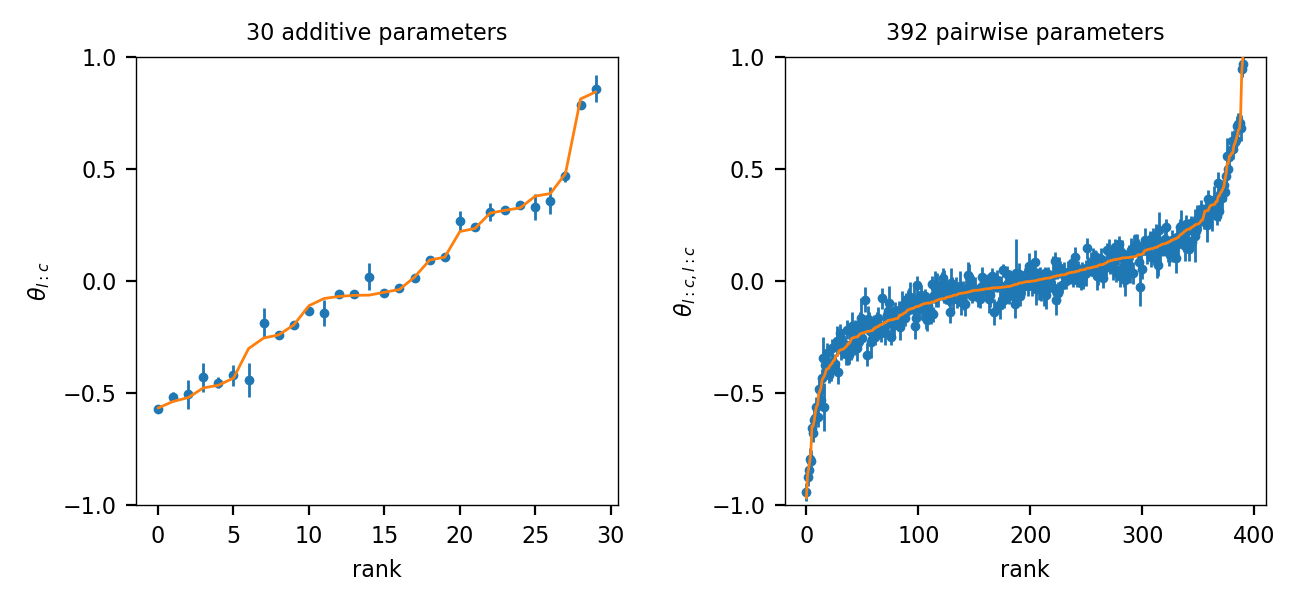

In [8]:
# Make figure
fig, axs = plt.subplots(1,2,figsize=[6.5,3], sharey=False)

# draw panel function
def draw(ax, 
         df, 
         ylabel, 
         title, 
         ylim=[-1,1], 
         yticks=[-1, -.5, 0, .5, 1]):
    ax.errorbar(x=df.index,
                y=df['mean'],
                yerr=df['std'],
                label='estimated',
                linewidth=0,
                elinewidth=1,
                marker='.',
                markersize=5)
    ax.plot(df.index,
            df['true'].values,
            label='true',
            linewidth=1,
            zorder=10)
    #ax.set_xticks([])
    #ax.legend()
    ax.set_title(title)
    ax.set_xlabel('rank')
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)

draw(ax=axs[0],
     df=theta_lc_df,
     ylabel=r'$\theta_{l:c}$',
     title=f'{len(theta_lc_df)} additive parameters')

draw(ax=axs[1],
     df=theta_lclc_df,
     ylabel=r'$\theta_{l:c,l:c}$',
     title=f'{len(theta_lclc_df)} pairwise parameters')

fig.tight_layout(w_pad=2)
fig.savefig('fig_S2_mpsa_uncertainties.png', dpi=300)